# Chapter 1: Introduction to Information Theory

## 1-1: How can we achieve perfect communication over an imperfect, noisy channel?

Noisy channels are as varied as analog telephones, radio, fiber optic, reproducing cells during mitosis, and a disk drive. In each case, there's always a chance that the content of the message upon receipt will not match exactly that which was transmitted.<br/>
Consider for example a noisy disk drive that transmits each bit correctly with a probability of $\left(1-f\right)$ and incorrectly with a probability of $f$. This is known as a **binary symmetric channel**. Here we model such a channel, using a black and white image.

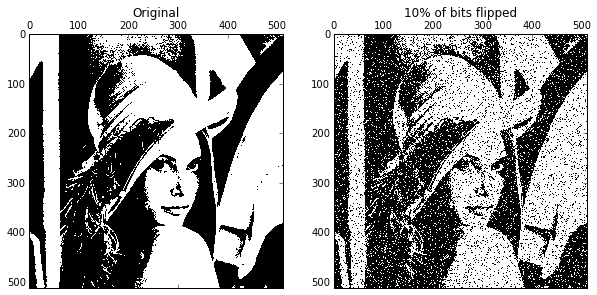

In [1]:
import numpy as np
import scipy.misc
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

image = scipy.misc.lena()
image = (image < 255.0/2) # binarize image

f = 0.1
noise = scipy.stats.bernoulli.rvs(f,size=image.shape).astype(np.bool)
noisy_image = np.logical_xor(image,noise) # 'adds' the noise to the image.

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax[0].matshow(image,cmap=plt.cm.Greys)
ax[1].matshow(noisy_image,cmap=plt.cm.Greys)
ax[0].set_title("Original")
ax[1].set_title("10% of bits flipped")
plt.show()

While we could try to build a better device with less noise, a more exciting approach is to device a system solution: accept the channel as noisy and add communication systems to detect and correct errors introduced by the channel. We could do this by encoding the source message $s$ into a transmitted message $t$, adding redundancy to the original message in some way. The channel adds noise to the transmitted message, yielding received message $r$. We can add a decoder on the receiving end, which uses the known redundancy introduced to infer both the original $s$ and the added noise.
The question then becomes, **how do we perform this encoding and decoding?**

## 1.2: Error Correcting Codes in Binary-Symmetric Channel

### Repetition Codes:

An easy way to make a error-correcting code is to repeat every bit of the message a prearranged number of times -- such as three times. We call this repetition code $\text{R}_{3}$.<br/>
Consider a source message
$$ \mathbf{s} = 0\ 0\ 1\ 0\ 1\ 1\ 0$$ sent over a binary symmetric channel with noise level $f=0.1$, using this repetition code. We can imagine the channel as 'adding' a sparse noise vector $\mathbf{n}$ to the transmitted vector. Additional is done modulo 2. The received message is vector $\mathbf{r} = \mathbf{t} + \mathbf{n}$:

\begin{array}{cccccccc}
\mathbf{s:} & 0 & 0 & 1 & 0 & 1 & 1 & 0 \\
\mathbf{t:} & \overbrace{000} & \overbrace{000} & \overbrace{111} & \overbrace{000} & \overbrace{111} & \overbrace{111} & \overbrace{000} \\
\mathbf{n:} & 000 & 001 & 000 & 000 & 101 & 000 & 000 \\
\hline
\mathbf{r:} & 000 & 001 & 111 & 000 & 010 & 111 & 000
\end{array}

How should we decode this message. As it turns out, the optimal decoding algorithm looks at the received bits of $\mathbf{r}$ three at a time (in correspondence with each bit of $\mathbf{s}$) and takes a majority vote. Rather than taking our word for it, lets prove this result.

#### Proof of Optimality of Majority-vote Decoding Algorithm

The optimal decoding decision (i.e. that with the smallest probability of being wrong) is to find which value of $\mathbf{s}$ is most probable, given $\mathbf{r}$. Consider a single bit $s$ encoded as $\mathbf{t}\left(s\right)$, giving rise to three received bits $\mathbf{r} = r_{1}r_{2}r_{3}$. By Bayes' Theorem the *posterior probability* of $s$ is
$$P\left(s|r_{1}r_{2}r_{3}\right) = \frac{P\left(r_{1}r_{2}r_{3}|s\right)P\left(s\right)}{P\left(r_{1}r_{2}r_{3}\right)} \propto P\left(r_{1}r_{2}r_{3}|s\right)P\left(s\right)$$
Since $s$ can only equal $0$ or $1$, we can explicitly express the two hypotheses as:

\begin{align}
P\left(s=1|r_{1}r_{2}r_{3}\right) & \propto P\left(r_{1}r_{2}r_{3}|s=1\right)P\left(s=1\right)\\
P\left(s=0|r_{1}r_{2}r_{3}\right) & \propto P\left(r_{1}r_{2}r_{3}|s=0\right)P\left(s=0\right)
\end{align}

To find $P\left(s=1|\mathbf{r}\right)$ and $P\left(s=0|\mathbf{r}\right)$, we must make an assumption about the prior probabilities of our hypotheses that $s=1$ and $s=0$, and we must also make an assumption about the probability of $\mathbf{r}$ given $s$. First, we assume the prior probabilities are equal -- that is, that $P\left(s=1\right)=P\left(s=0\right)=0.5$. This allows us to write:

\begin{align}
P\left(s=1|\mathbf{r}\right) & \propto P\left(\mathbf{r}|s=1\right)\\
P\left(s=0|\mathbf{r}\right) & \propto P\left(\mathbf{r}|s=0\right)
\end{align}

since the priors and the normalizing constant are equal in both cases. Next, we assume the channel is a binary symmetric channel with noise level $f < 0.5$, so that the liklihood is
$$P\left(\mathbf{r}|s\right) = 
P\left(\mathbf{r}|\mathbf{t}\left(s\right)\right) = 
\prod_{n=1}^{N}{P\left(r_{n}|t_{n}\left(s\right)\right)},$$
where $N=3$ is the number of transmitted bits per block, and
$$P\left(r_{n}|t_{n}\right) =
\begin{cases}
\left( 1-f \right), & \text{if } r_{n} = t_{n} \\
f, & \text{if } r_{n} = t_{n}
\end{cases}.$$ Thus the likelihood ratio for the two hypotheses is:
$$\frac{P\left(s=1|\mathbf{r}\right)}{P\left(s=0|\mathbf{r}\right)} = 
\prod_{n=1}^{N}{\frac{P\left(r_{n}|t_{n}\left(1\right)\right)}{P\left(r_{n}|t_{n}\left(0\right)\right)}},$$
where each $\frac{P\left(r_{n}|t_{n}\left(1\right)\right)}{P\left(r_{n}|t_{n}\left(0\right)\right)}$ equals $\frac{1-f}{f}$ if $r_{n}=1$ and $\frac{f}{1-f}$ if $r_{n}=0$. Since $f < 0.5$ then $\gamma \equiv \frac{1-f}{f} > 1$, and our likelihood ratio ends up being a product of $\gamma$'s and $\frac{1}{\gamma}$'s. Whichever bit is represented more in $\mathbf{r}$ will determine whether our likelihood ratio is less than, greater than, or equal to $1$. Thus, the winning hypothesis is the one which receives more 'votes', or is represented more in $\mathbf{r}$.

#### Example of Error Correcting with Repetition Codes

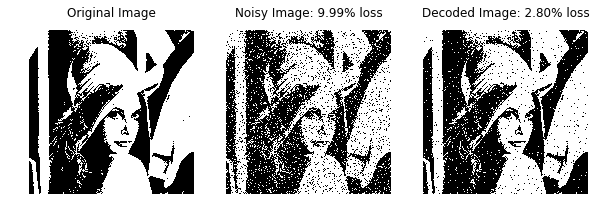

In [2]:
import numpy as np
import scipy.misc
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

def encode(s,N=3):
    return np.repeat(s,3).reshape(-1,N).T

def decode(r,N,shape):
    return (sum(r) > int(N/2)).astype(int).reshape(shape)

def send(t,f):
    noise = scipy.stats.bernoulli.rvs(f,size=t.shape)
    return np.logical_xor(t,noise).astype(int)

f = 0.1
N=3

image = scipy.misc.lena()
s = (image < 255.0/2).astype(np.int) # Binarize the image.
t = encode(s,N) # Encode the image with the repetition.
r = send(t,f) # Send the encoded image over the noisy channel.
s_hat = decode(r,N,s.shape) # Decode the noisy encoded image.

loss = 100 * np.where(
    s.ravel() != send(s,f).ravel()
)[0].size / s.ravel().size
loss_with_encoding = 100 * np.where(
    s.ravel() != s_hat.ravel()
)[0].size / s.ravel().size

fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(10,5))
ax[0].matshow(s,cmap=plt.cm.Greys)
ax[1].matshow(send(s,f),cmap=plt.cm.Greys)
ax[2].matshow(s_hat,cmap=plt.cm.Greys)
ax[0].set_title("Original Image")
ax[1].set_title("Noisy Image: %0.2f%% loss" % loss)
ax[2].set_title("Decoded Image: %0.2f%% loss" % loss_with_encoding)
[image.axis('off') for image in [ax[i] for i in range(3)]]
plt.show()

#### Exercise 1.2:

**Show the error probability is reduced by the use of $\text{R}_{3}$ by computing the error probability of this code for a binary symmetric channel with noise level $f$.**

*For a given bit $s$, $s$ is transmitted as the triplet $\mathbf{s} = \left[s_{1},s_{2},s_{3}\right]$. For an error to occur, $\mathbf{s}$ must have at least two flipped bits. This is equal to the sum of the probability of $\mathbf{s}$ having two flipped bits and the probability of it having three flipped bits. Since any given bit is subject to being flipped with a probability of $f$, we find that
\begin{align}
P\left(\text{Error on s}\right) &= P\left(\text{s has two flipped bits}\right) + P\left(\text{s has three flipped bits}\right) \\
&= {3\choose2}\left(f\times f \times \left(1-f\right)\right) + \left(f \times f \times f \right) \\
&= 3f^{2}\left(1-f\right) + f^{3} \\
&= 3f^{2} - 2f^{3}
\end{align}
Without using an error correcting code, the error probability on our channel is $f$. The prove that the use of $\text{R}_{3}$ results in a lower error probability, we need only show that $3f^{2} - 2f^{3} < f$. This is equivalent to finding the values of $f$ for which $3f - 2f^{2} -1 < 0$. Solving this quadratic, we find that $3f^{2} - 2f^{3} < f$ when $f < \frac{1}{2}$. If $f > \frac{1}{2}$, however, we could simply flip all the bits of our signal before transmission, thereby giving the channel an error rate of $\left(1-f\right) < \frac{1}{2}$. Thus, we find that for any $f$, the use of $\text{R}_{3}$ results in a reduced error probability.*<br/>$\Box$

We found that for the repetition code $R_{3}$ the probability of error on any one bit is $p_{3} = 2f^{2}-3f^{3}$. In the case of $f=0.1$, $p_{3}=0.028$. This result is suggested by the loss observed in the above example.<br/> 
As it turns out, we can generalize this result to calculate the error probability for any repetition code $R_{N}$.

#### Exercise 1.3:

**(a): Find the probability of error for $R_{N}$, where $N$ is odd.**

Given odd $N$ and a noisy channel with error probability $f$, then any bit $s$ in our message is transmitted as the $N$-tuple $\mathbf{s} = \left\{s_{1},\cdots,s_{N-1},s_{N}\right\}$. For $s$ to be received flipped, at least $\frac{\left(N+1\right)}{2}$ (or the majority) of the bits in $\mathbf{s}$ must be flipped. Since the probability of any one bit configuration is independent of any other, we find that
\begin{align}
P_{b} &= P\left(>\frac{\left(N+1\right)}{2}\text{ bits flipped}\right) \\
&=\bigcup_{n=\frac{\left(N+1\right)}{2}}^{N}{P\left(n\text{ bits flipped}\right)} \\
&= \sum_{n=\frac{\left(N+1\right)}{2}}^{N}{P\left(n\text{ bits flipped}\right)}
\end{align}
Then for any given integer $n \in \left[\frac{\left(N+1\right)}{2},N\right]$, the probability of exactly $n$ bits being flipped is equal to $${N \choose n}f^{n}\left(1-f\right)^{N-n}$$, which represents the ${N \choose n}$ ways in which $n$ bits can be flipped and the remaining $N-n$ bits remain unflipped. Thus, our probability $p_{b}$ is
$$p_{b} = \sum_{n=\frac{\left(N+1\right)}{2}}^{N}{{N \choose n}f^{n}\left(1-f\right)^{N-n}}$$

**(b): Assuming $f=0.1$, which of the terms in this sum is the biggest? How much bigger is it than the second-biggest term?**

The first term dominates the expression for $p_{n}$. To see this, note that
\begin{align}
p_{b} &= \sum_{n=\frac{\left(N+1\right)}{2}}^{N}{{N \choose n}f^{n}\left(1-f\right)^{N-n}}\\
&= \sum_{n=\frac{\left(N+1\right)}{2}}^{N}{{N \choose n}0.1^{n}0.9^{N-n}} \\
&= \sum_{n=\frac{\left(N+1\right)}{2}}^{N}{{N \choose n}0.1^{n}0.1^{N-n}9^{N-n}} \\
&= \sum_{n=\frac{\left(N+1\right)}{2}}^{N}{{N \choose n}0.1^{N}\frac{9^{N}}{9^{n}}} \\
&=  0.9^{N}\sum_{n=\frac{\left(N+1\right)}{2}}^{N}{{N \choose n}9^{-n}}
\end{align}
Because for $n > \frac{N+1}{2}$ the value ${N \choose n}$ is decreasing (see any row of Pascal's Triangle), we can conclude that the first term of $p_{b}$ is the largest.

**(c): Using Stirling's Approximation to approximate ${N \choose n}$ in the largest term, and find, approximately, the probability of error of the repetition code with $N$ repetitions.**

**Stirling's approximation** of the factorial function is given by
$$x! \approx x^{x}e^{-x}\sqrt{2\pi x} \Longleftrightarrow \ln x! \approx x\ln x - x + \frac{1}{2}\ln 2\pi x$$ This expression tells us that the leading order behavior of $x!$ is given by $x^{x}e^{-x}$, and that the next order behavior is given by the corrective term $\sqrt{2\pi x}$. Applied to $\ln{N \choose n}$, we find that after some wrangling of terms that
$$\ln{N \choose n} = \ln\frac{N!}{n! \left(N-n\right)!} \approx \left(N-n\right)\ln\frac{N}{N-n}+n\ln\frac{N}{n}$$
Since all the terms in this equation are logarithms, the equation generalizes to logs of any base. If we denote $\log_{2}$ as $\log$ and define the **binary entropy function**
$$H_{2}\left(x\right) = x\log\frac{1}{x} + \left(1-x\right)\log\frac{1}{1-x}$$
we can rewrite our approximation as
$$\log{N \choose n} \approx NH_{2}\left(\frac{n}{N}\right) \Longleftrightarrow {N \choose n} \approx 2^{NH_{2}\left(\frac{n}{N}\right)}$$
Using this, we find that
\begin{align}
p_{b} &= \sum_{n=\frac{\left(N+1\right)}{2}}^{N}{{N \choose n}f^{n}\left(1-f\right)^{N-n}}\\
&\approx \sum_{n=\frac{\left(N+1\right)}{2}}^{N}{2^{NH_{2}\left(\frac{n}{N}\right)}f^{n}\left(1-f\right)^{N-n}}\\
&\approx \left. 2^{NH_{2}\left(\frac{n}{N}\right)}f^{n}\left(1-f\right)^{N-n} \right|_{n = \frac{N}{2}} \\
&= 2^{NH_{2}\left(\frac{1}{2}\right)}f^{\frac{N}{2}}\left(1-f\right)^{\frac{N}{2}} \\
&= 2^{N}f^{\frac{N}{2}}\left(1-f\right)^{\frac{N}{2}} \\
&= \left(4f\left(1-f\right)\right)^{\frac{N}{2}} \\
\end{align}

#### **(d): Assuming $f=0.1$, find how many repetitions $N$ are required to get the probability error down to $10^{-15}$.**

Using the approximation for $p_{b}$ found in the previous step, by substituting $0.1$ for $f$ and $10^{-15}$ for $p_{b}$, we see
$$10^{-15} = \left(4\cdot 0.1 \cdot 0.9\right)^{\frac{N}{2}} = 0.36^{\frac{N}{2}}$$ Solving for $N$, we find that
\begin{align}
N &= 2\log_{0.36}\left(10^{-15}\right) \\
&= 2\frac{\log10^{-15}}{\log0.36}\\
&\approx 68
\end{align}
$\Box$

While the equations derived in the previous example suggest that it is possible to use repetition codes to communicate across noisy channels with an arbitrarily small probability of error, this error reduction comes at the price of our *rate* of information transfer. For example, we just showed that given a noisy channel where $f=0.1$, we would need to use over 60 disk drives to achieve an error of $10^{-15}$. For any given $N$, to communicate using the repetition code $R_{N}$ reduces our rate of information transfer by a factor of $N$. This is seen in the following plot.

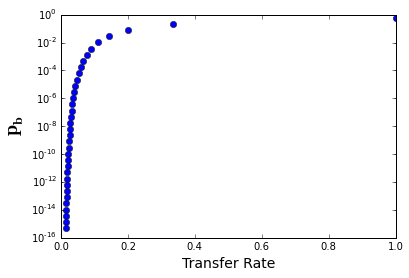

In [3]:
import numpy as np
import scipy.misc
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

f=0.1
N = np.arange(1,70,2)
rate = N.astype(float)**(-1)
prob = (4.0*f*(1-f))**(N/2.0)
plt.plot(rate,prob,'o')
plt.ylabel(r'$\mathbf{p_{b}}$',fontsize=20)
plt.xlabel("Transfer Rate",fontsize=14)
plt.yscale('log',nonposy='clip')
plt.show()

### Block Codes: The $\left(7,4\right)$ Hamming Code

We saw that repetition codes -- while allowing us to communicate over noisy channels with arbitrarily small error probability, reduce our transfer rate significantly. Ideally, we would like to communicate with both a tiny error probability *and* at a substantial rate. We can improve upon repetition codes in this regard by adding redundancy to *blocks* of data instead of each bit. These are known as **block codes**. A block code is a rule for converting a sequence of source bits $\mathbf{s}$ of length $K$ bits into a transmitted seuqnece $\mathbf{t}$ of length $N$ bits. In a **linear block code**, the extra $N-K$ bits are linear functions of the original $K$ bits, and are called **parity check bits**. Here we will study a specific linear block code known as the **$\left(7,4\right)$ Hamming Code**, which transmits $N=7$ bits for every $K=4$ source bits.

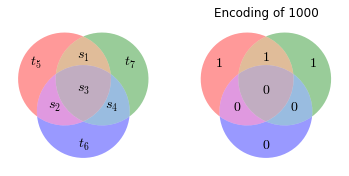

In [74]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
%matplotlib inline

f,ax = plt.subplots(nrows=1,ncols=2)
v1 = venn3(subsets=(1,1,1,1,1,1,1),set_labels=('','',''),ax=ax[0])
v2 = venn3(subsets=(1,1,1,1,1,1,1),set_labels=('','',''),ax=ax[1])
v1_labels = {
'110':r'${s_{1}}$','101':r'$s_{2}$',
'111':r'$s_{3}$','011':r'$s_{4}$',
'100':r'$t_{5}$','001':r'$t_{6}$',
'010':r'$t_{7}$',
}
v2_labels = {
'110':r'$1$','101':r'$0$',
'111':r'$0$','011':r'$0$',
'100':r'$1$','001':r'$0$',
'010':r'$1$',
}
for index,label in v1_labels.items():
    v1.get_label_by_id(index).set_text(label)
    v1.get_label_by_id(index).set_size(14)
for index,label in v2_labels.items():
    v2.get_label_by_id(index).set_text(label)
    v2.get_label_by_id(index).set_size(14)
ax[1].set_title("Encoding of 1000")
plt.show()

##### Encoding the $\left(7,4\right)$ Hamming Code

The encoding operation for the code is shown above. We arrange the seven transmitted bits in three intersecting circles. The first four transmitted bits $\left\{t_{1},t_{2},t_{3},t_{4}\right\}$ are set equal to the four source bits $\left\{s_{1},s_{2},s_{3},s_{4}\right\}$. The remaining three transmitted bits are set so that the parity within each circle is even. That is, $t_{5}$ is set so that the sum $s_{1}+s_{2}+s_{3}+t_{5}$ is even, $t_{6}$ is set so that the sum $s_{2}+s_{3}+s_{4}+t_{6}$ is even, and $t_{7}$ is set so that the sum $s_{1}+s_{3}+s_{4}+t_{7}$ is even. For example, the second figure above shows the encoding for $\mathbf{s} = 1000$.<br/><br/>
Because the Hamming code is a linear code, it can be written in terms of matrices. The transmitted codeword $\mathbf{t}$ is obtained from the source sequence $\mathbf{s}$ by the linear operation
$$\mathbf{t}=\mathbf{G}^{T}\mathbf{s}$$
where $\mathbf{G}$ is the *generator matrix* of the code,
$$\mathbf{G}^{T}=
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
1 & 1 & 1 & 0 \\
0 & 1 & 1 & 1 \\
1 & 0 & 1 & 1 \\
\end{bmatrix}
$$
The encoding operation uses binary arithmetic.

##### Decoding the $\left(7,4\right)$ Hamming Code

When a more complex encoding $\mathbf{s} \to \mathbf{t}$ is devised, the task of decoding becomes more complex as well. In the case of the $\left(7,4\right)$ Hamming Code, remember that *any* of the transmitted bits may have been flipped, including the parity bits. If we assume that the channel is binary symmetric and that all source vectors are equiprobable, then the optimal decoder is the one that identifies the source vector $\mathbf{s}$ whose encoding $\mathbf{t}\left(\mathbf{s}\right)$ differs from the received vector $\mathbf{r}$ in the fewest bits.<br/>
To see why, note that there are $2^{4}=16$ possible configurations for the $4$ source bits in $\mathbf{s}$, and they are
\begin{array}{cc|cc|cc|cc}
\hline
\mathbf{s} & \mathbf{t} & \mathbf{s} & \mathbf{t} & \mathbf{s} & \mathbf{t} & \mathbf{s} & \mathbf{t} \\
\hline
0000 & 0000000 & 0001 & 0001011 & 0010 & 0010111 & 0011 & 0011100 \\
0100 & 0100110 & 0101 & 0101101 & 0110 & 0110001 & 0111 & 0111010 \\
1000 & 1000101 & 1001 & 1001110 & 1010 & 1010010 & 1011 & 1011001 \\
1100 & 1100011 & 1101 & 1101000 & 1110 & 1110100 & 1111 & 1111111 \\
\end{array}
These codewords have the special property of differing from one another by at least three bits. We can then ask the question: For which values of $f$ is it more likely to have less than 3 bits flipped out of 7? While solving this analytically would be cumbersome, we can numerically estimate the answer with Python:

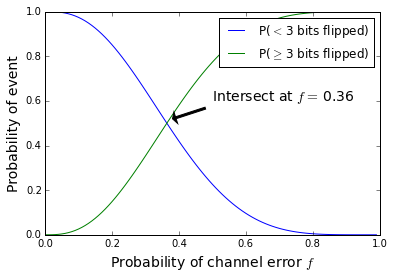

In [55]:
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
f_range = np.arange(0,1,0.01)
P_less_than_3 = []
P_gt_equal_3 = []
for f in f_range:
    P_less_than_3.append(sum([scipy.misc.comb(7,i)*(f**i)*(1-f)**(7-i) for i in [0,1,2]]))
    P_gt_equal_3.append(sum([scipy.misc.comb(7,i)*(f**i)*(1-f)**(7-i) for i in [3,4,5,6,7]]))
P_less_than_3 = np.array(P_less_than_3)
P_gt_equal_3 = np.array(P_gt_equal_3)
intersect = np.argmin(np.abs(P_less_than_3 - P_gt_equal_3))
f_intersect = f_range[intersect]
plt.plot(f_range,P_less_than_3,label=r'P($<$ 3 bits flipped)')
plt.plot(f_range,P_gt_equal_3,label=r'P($\geq$ 3 bits flipped)')
plt.xlabel(r'Probability of channel error $f$',fontsize=14)
plt.ylabel(r'Probability of event',fontsize=14)
plt.annotate(
    r"Intersect at $f=$ %0.2f" % f_intersect, 
    xy=(f_intersect,P_less_than_3[intersect]),
    xytext=(0.5,0.6),
    arrowprops=dict(facecolor='black', width=2, shrink = 0.15),
    fontsize=14
)
plt.legend()
plt.show()

Thus, for $f < \approx 0.36$, it is more likely for less than three bits to be flipped, and therefore our most likely source codeword $\mathbf{t}\left(\mathbf{s}\right)$ is that which is closest to our received vector $\mathbf{r}$, or differs from $\mathbf{r}$ in the least amount of bits.

If we receive a vector $\mathbf{r}$ and the parity bits of $\mathbf{r}$ are not even, then our task is to find the smallest sit of flipped bits that can account for these parity violations. The pattern of parity violations is called the *syndrome*, and can be written as a binary vector. The first four received bits $\left\{r_{1},r_{2},r_{3},r_{4}\right\}$ purport to be the four source bits, and the remaining three received bits $\left\{r_{5},r_{6},r_{7}\right\}$ purport to be the parities of the source bits, as defined by the generator matrix $\mathbf{G}$. For the four received source bits, we calculate their parity-check bits and compare them with the received parity-check bits $\left\{r_{5},r_{6},r_{7}\right\}$. The differences between these two triplets is the syndrome of the received vector. If the syndrome is $\mathbf{0}$, then all three parity checks were legitimate and the most probable decoding is given simply by the four received source bits $\left\{r_{1},r_{2},r_{3},r_{4}\right\}$. If the syndrome is non-zero, then the noise for this block was non-zero, and the syndrome will point us to the most probable error pattern, and thereby the most probable decoding.<br/><br/>
The computation of the syndrome vector is a linear operation. If we redefine the generator matrix $\mathbf{G}$ as consisting of two submatrices $\mathbf{I}_4$ and $\mathbf{P}$ such that 
$$\mathbf{G}^{T} =
\begin{bmatrix}
\mathbf{I}_4 \\
\mathbf{P}
\end{bmatrix} = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
1 & 1 & 1 & 0 \\
0 & 1 & 1 & 1 \\
1 & 0 & 1 & 1 \\
\end{bmatrix}
$$
then the syndrome vector is $\mathbf{z} = \mathbf{H}\mathbf{r}$, where the *parity-check matrix* $\mathbf{H}$ is given by $$\mathbf{H} = \begin{bmatrix}-\mathbf{P} & \mathbf{I}_{3}\end{bmatrix}.$$ Since in modulo-2 arithmetic $-1 \equiv 1$, it follows that
$$
\mathbf{H} = 
\begin{bmatrix}
-\mathbf{P} & \mathbf{I}_{3}
\end{bmatrix} = 
\begin{bmatrix}
\mathbf{P} & \mathbf{I}_{3}
\end{bmatrix} = 
\begin{bmatrix}
1 & 1 & 1 & 0 & 1 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 & 1 & 0 \\
1 & 0 & 1 & 1 & 0 & 0 & 1 \\
\end{bmatrix}
$$<br/>
For example, consider the source block $\mathbf{s} = 1000$. $\mathbf{s}$ gets transmitted as $$\mathbf{t} = \mathbf{G}^{T}\mathbf{s} =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
1 & 1 & 1 & 0 \\
0 & 1 & 1 & 1 \\
1 & 0 & 1 & 1 \\
\end{bmatrix}
\begin{bmatrix}
1\\
0\\
0\\
0\\
\end{bmatrix} = 
\begin{bmatrix}
1 \\
0 \\
0 \\
0 \\
1 \\
0 \\
1 \\
\end{bmatrix}
$$<br/>
Suppose that $\mathbf{t}$ is received as $\mathbf{r}^{T} = \begin{bmatrix}1 & 0 & 0 & 1 & 1 & 0 & 1\end{bmatrix}$, where the fourth bit was flipped by the noise vector $\mathbf{n} = \begin{bmatrix}0 & 0 & 0 & 1 & 0 & 0 & 0\end{bmatrix}$. Our syndrome vector $\mathbf{z}$ is then
$$
\mathbf{z} = 
\mathbf{H}\mathbf{r} =
\begin{bmatrix}
1 & 1 & 1 & 0 & 1 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 & 1 & 0 \\
1 & 0 & 1 & 1 & 0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
1 \\
0 \\
0 \\
1 \\
1 \\
0 \\
1 \\
\end{bmatrix} = 
\begin{bmatrix}
0 \\
1 \\
1 \\
\end{bmatrix}.
$$<br/>
Referring back to the visual representation of the $\left(7,4\right)$ Hamming code,

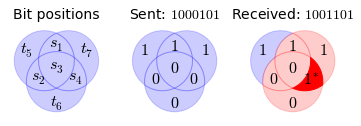

In [110]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
%matplotlib inline

f,ax = plt.subplots(nrows=1,ncols=3)
v1 = venn3(subsets=(1,1,1,1,1,1,1),set_labels=('','',''),ax=ax[0])
v2 = venn3(subsets=(1,1,1,1,1,1,1),set_labels=('','',''),ax=ax[1])
v3 = venn3(subsets=(1,1,1,1,1,1,1),set_labels=('','',''),ax=ax[2])
v1_labels = {
'110':r'${s_{1}}$','101':r'$s_{2}$',
'111':r'$s_{3}$','011':r'$s_{4}$',
'100':r'$t_{5}$','001':r'$t_{6}$',
'010':r'$t_{7}$',
}
v2_labels = {
'110':r'$1$','101':r'$0$',
'111':r'$0$','011':r'$0$',
'100':r'$1$','001':r'$0$',
'010':r'$1$',
}
v3_labels = {
'110':r'$1$','101':r'$0$',
'111':r'$0$','011':r'$1^{*}$',
'100':r'$1$','001':r'$0$',
'010':r'$1$',
}
for index,label in v1_labels.items():
    v1.get_patch_by_id(index).set_alpha(0.2)
    v1.get_patch_by_id(index).set_color("blue")
    v1.get_label_by_id(index).set_text(label)
    v1.get_label_by_id(index).set_size(16)
for index,label in v2_labels.items():
    v2.get_patch_by_id(index).set_alpha(0.2)
    v2.get_patch_by_id(index).set_color("blue")
    v2.get_label_by_id(index).set_text(label)
    v2.get_label_by_id(index).set_size(16)
for index,label in v3_labels.items():
    v3.get_patch_by_id(index).set_alpha(0.2)
    v3.get_patch_by_id(index).set_color("blue")
    v3.get_label_by_id(index).set_text(label)
    v3.get_label_by_id(index).set_size(16)
for patch in ['110','101','111','011','001','010']:
    v3.get_patch_by_id(patch).set_color('red')
v3.get_patch_by_id('011').set_alpha(1)
ax[0].set_title("Bit positions",fontsize=14)
ax[1].set_title(r"Sent: $1000101$",fontsize=14)
ax[2].set_title(r"Received: $1001101$",fontsize=14)
plt.show()

Notice in the example above, the flipped bit $s_{4}$ (shaded dark red) has disrupted the parity of two of the three circles (shaded in red). The syndrome in this case is the triple formed by the parities of the three 4-tuples $
\left\{ 
\left(s_{1} s_{2} s_{3} t_{5}\right),
\left(s_{2} s_{3} s_{4} t_{6}\right),
\left(s_{1} s_{3} s_{4} t_{7}\right)
\right\}$. We can validate visually that the syndrome is what was calculated above using matrices: $\left(0,1,1\right)$. All that needs to be done to find the optimal decoding is to determine which single bit must be flipped in order to obtain even parity across all three circles again. In other words, find one bit lying inside the uneven circles, and outside the even ones. In our case, the offending bit is $s_{4}$, exactly the one that was flipped during transmission. Flipping this bit back to $0$ will give us the transmitted codeword $1000101$, and thereby our source block $1000$.<br/> 
In general, we can see that by flipping any one of the seven bits (and adding the case where none are flipped), we can obtain eight different syndromes. Furthermore, we can map for each syndrome which bit must be unflipped in order to obtain the most likely transmission vector:<br/>
\begin{array}{c|cccccccc}
\text{Syndrome }\mathbf{z} & 000 & 001 & 010 & 011 & 100 & 101 & 110 & 111 \\
\hline
\text{Unflip this bit} & none & r_{7} & r_{6} & r_{4} & r_{5} & r_{1} & r_{2} & r_{3}
\end{array}<br/>
But what happens if the noise flips more than one bit? For example, suppose that for $\mathbf{s} = 1001$, which is transmitted as $\mathbf{t} = 1001110$, is received as $\mathbf{r} = 1101100$, where the noise has flipped the second and sixth bits $r_{2}$ and $r_{6}$. The syndrome in this case would be $\left\{|0-1|,|0-0|,|0-0|\right\} = \left\{1,0,0\right\}$, which suggests that $r_{5}$ was the flipped bit. By unflipping $r_{5}$, we in fact increase our error count from two to three, and erroneously decode our message as $\mathbf{t}' = 1101000 \Rightarrow \mathbf{s}' = 1101$, when our $\mathbf{s}$ was in fact $1001$. What this tells us is that the $\left(7,4\right)$ Hamming code is able to correct one-bit errors, but for errors of two or more bits, it will actually increase the error count.<br/><br/>
Now lets implement this in Python and evaluate its performance.

#### Example of Error Correction with $\left(7,4\right)$ Hamming Codes

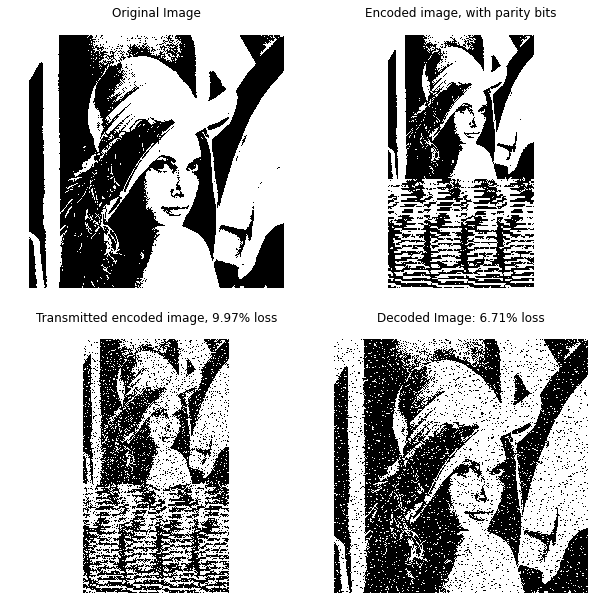

In [140]:
import numpy as np
import scipy.misc
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

def encode_74_hamming(s):
    s_mod = np.concatenate([s,np.zeros(4-np.mod(s.size,4))]) # len(s_mod) % 4 == 0
    source_bits = np.array(np.split(s_mod,s_mod.size/4)) # split into array of 4-blocks
    parity_bits = np.array([
        np.mod(np.sum(source_bits[:,(0,1,2)],axis=1),2),
        np.mod(np.sum(source_bits[:,(1,2,3)],axis=1),2),
        np.mod(np.sum(source_bits[:,(0,2,3)],axis=1),2)
    ],dtype=bool).T
    transmission = np.hstack((source_bits,parity_bits)).astype(bool) # => [source parity]
    return transmission.ravel()

def visualize_encoded(t,s_shape):
    t_blocks = np.array(np.split(t,t.size/7))
    source_bits = t_blocks[:,:4].ravel()[:(s_shape[0]*s_shape[1])].reshape(s_shape)
    parity_bits = t_blocks[:,4:].ravel()
    parity_columns = source_bits.shape[1]
    parity_rows = int(parity_bits.size/parity_columns)
    parity_bits = parity_bits[:(parity_rows*parity_columns)].reshape(parity_rows,parity_columns)
    return np.vstack([source_bits,parity_bits]).astype(bool)

def send(t,f):
    noise = scipy.stats.bernoulli.rvs(f,size=t.shape)
    return np.logical_xor(t,noise).astype(bool)

def decode_74_hamming(r,s_size):
    received_vectors = np.array(np.split(r,r.size/7)) # split into array of 7-blocks
    H = np.array([[1,1,1,0,1,0,0],[0,1,1,1,0,1,0],[1,0,1,1,0,0,1]])
    syndromes = list(map(tuple,np.mod(np.dot(H,received_vectors.T),2).T))
    unflip_bit = {
        (0,0,0): np.array([0,0,0,0,0,0,0]),
        (0,0,1): np.array([0,0,0,0,0,0,1]),
        (0,1,0): np.array([0,0,0,0,0,1,0]),
        (0,1,1): np.array([0,0,0,1,0,0,0]),
        (1,0,0): np.array([0,0,0,0,1,0,0]),
        (1,0,1): np.array([1,0,0,0,0,0,0]),
        (1,1,0): np.array([0,1,0,0,0,0,0]),
        (1,1,1): np.array([0,0,1,0,0,0,0])
    }
    bits_to_unflip = np.array([unflip_bit[syndrome] for syndrome in syndromes])
    return np.logical_xor(received_vectors,bits_to_unflip)[:,:4].ravel()[:s_size]
    
    
    
f=0.1
image = scipy.misc.lena()
s = (image < 255.0/2).astype(bool) # Binarize the image.
t = encode_74_hamming(s.ravel())
r = send(t,f)
s_decoded = decode_74_hamming(r,s.size)

loss = 100 * np.where(
    t.ravel() != send(t,f).ravel()
)[0].size / t.ravel().size
loss_with_encoding = 100 * np.where(
    s.ravel() != s_decoded.ravel()
)[0].size / s.ravel().size

f, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
ax[0,0].matshow(s,cmap=plt.cm.Greys)
ax[0,1].matshow(visualize_encoded(t,s.shape),cmap=plt.cm.Greys)
ax[1,0].matshow(visualize_encoded(r,s.shape),cmap=plt.cm.Greys)
ax[1,1].matshow(s_decoded.reshape(s.shape),cmap=plt.cm.Greys)
ax[0,0].set_title("Original Image")
ax[0,1].set_title("Encoded image, with parity bits")
ax[1,0].set_title("Transmitted encoded image, %0.2f%% loss" % loss)
ax[1,1].set_title("Decoded Image: %0.2f%% loss" % loss_with_encoding)
[image.axis('off') for image in [ax[i,j] for (i,j) in [(0,0),(0,1),(1,0),(1,1)]]]
plt.show()